In [1]:
# import pandas
import pandas as pd

## 1. How do I read a tabular data file into pandas?

In [2]:
# read a dataset of Chipotle orders directly from a URL and store the results in a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')

In [3]:
# examine the first 5 rows
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)

In [5]:
# examine the first 5 rows
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## 2. How do I select a pandas Series from a DataFrame? ([video](https://www.youtube.com/watch?v=zxqjeyKP2Tk&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=3))

In [5]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_table('http://bit.ly/uforeports', sep=',')

In [6]:
# read_csv is equivalent to read_table, except it assumes a comma separator
ufo = pd.read_csv('http://bit.ly/uforeports')

In [7]:
# examine the first 5 rows
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [8]:
# select the 'City' Series using bracket notation
ufo['City']

# or equivalently, use dot notation
ufo.City

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
5                 Valley City
6                 Crater Lake
7                        Alma
8                     Eklutna
9                     Hubbard
10                    Fontana
11                   Waterloo
12                     Belton
13                     Keokuk
14                  Ludington
15                Forest Home
16                Los Angeles
17                  Hapeville
18                     Oneida
19                 Bering Sea
20                   Nebraska
21                        NaN
22                        NaN
23                  Owensboro
24                 Wilderness
25                  San Diego
26                 Wilderness
27                     Clovis
28                 Los Alamos
29               Ft. Duschene
                 ...         
18211                 Holyoke
18212                  Carson
18213     

**Bracket notation** will always work, whereas **dot notation** has limitations:

- Dot notation doesn't work if there are **spaces** in the Series name
- Dot notation doesn't work if the Series has the same name as a **DataFrame method or attribute** (like 'head' or 'shape')
- Dot notation can't be used to define the name of a **new Series** (see below)

In [9]:
# create a new 'Location' Series (must use bracket notation to define the Series name)
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 3. Why do some pandas commands end with parentheses (and others don't)? ([video](https://www.youtube.com/watch?v=hSrDViyKWVk&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=4))

In [10]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')

**Methods** end with parentheses, while **attributes** don't:

In [11]:
# example method: show the first 5 rows
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [12]:
# example method: calculate summary statistics
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [13]:
# example attribute: number of rows and columns
movies.shape

(979, 6)

In [14]:
# example attribute: data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [15]:
# use an optional parameter to the describe method to summarize only 'object' columns
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Les Miserables,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


### 4. How do I sort a pandas DataFrame or a Series? ([video](https://www.youtube.com/watch?v=zY4doF6xSxY&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=7))

In [16]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


**Note:** None of the sorting methods below affect the underlying data. (In other words, the sorting is temporary).

In [17]:
# sort the 'title' Series in ascending order (returns a Series)
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [18]:
# sort in descending order instead
movies.title.sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

In [19]:
# sort the entire DataFrame by the 'title' Series (returns a DataFrame)
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [20]:
# sort in descending order instead
movies.sort_values('title', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
864,7.5,[Rec],R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."


Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) for a **DataFrame**. (Prior to version 0.17, use [**`sort`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sort.html) instead.)

In [21]:
# sort the DataFrame first by 'content_rating', then by 'duration'
movies.sort_values(['content_rating', 'duration']).head()

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


## 5. How do I filter rows of a pandas DataFrame by column value? ([video](https://www.youtube.com/watch?v=2AFGPdNn4FM&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=8))

In [22]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [23]:
# examine the number of rows and columns
movies.shape

(979, 6)

**Goal:** Filter the DataFrame rows to only show movies with a 'duration' of at least 200 minutes.

In [24]:
# create a list in which each element refers to a DataFrame row: True if the row satisfies the condition, False otherwise
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [25]:
# confirm that the list has the same length as the DataFrame
len(booleans)

979

In [26]:
# examine the first five list elements
booleans[0:5]

[False, False, True, False, False]

In [27]:
# convert the list to a Series
is_long = pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [28]:
# use bracket notation with the boolean Series to tell the DataFrame which rows to display
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [29]:
# simplify the steps above: no need to write a for loop to create 'is_long' since pandas will broadcast the comparison
is_long = movies.duration >= 200
movies[is_long]

# or equivalently, write it in one line (no need to create the 'is_long' object)
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [30]:
# select the 'genre' Series from the filtered DataFrame
movies[movies.duration >= 200].genre

# or equivalently, use the 'loc' method
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 6. How do I apply multiple filter criteria to a pandas DataFrame? ([video](https://www.youtube.com/watch?v=YPItfQ87qjM&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=9))

In [31]:
# filter the DataFrame to only show movies with a 'duration' of at least 200 minutes
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Understanding **logical operators:**

- **`and`**: True only if **both sides** of the operator are True
- **`or`**: True if **either side** of the operator is True

Rules for specifying **multiple filter criteria** in pandas:

- use **`&`** instead of **`and`**
- use **`|`** instead of **`or`**
- add **parentheses** around each condition to specify evaluation order

**Goal:** Further filter the DataFrame of long movies (duration >= 200) to only show movies which also have a 'genre' of 'Drama'

In [32]:
# CORRECT: use the '&' operator to specify that both conditions are required
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [33]:
# INCORRECT: using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


**Goal:** Filter the original DataFrame to show movies with a 'genre' of 'Crime' or 'Drama' or 'Action'

In [34]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


Documentation for [**`isin`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 7. When reading from a file, how do I read in only a subset of the rows?

In [35]:
# specify how many rows to read
ufo = pd.read_csv('http://bit.ly/uforeports', nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

## 8. How do I drop all non-numeric columns from a DataFrame?

In [36]:
# read a dataset of alcohol consumption into a DataFrame, and check the data types
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [37]:
# only include numeric columns in the DataFrame
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

Documentation for [**`select_dtypes`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html)

## 9. How do I use the "axis" parameter in pandas? ([video](https://www.youtube.com/watch?v=PtO3t6ynH-8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=11))

In [38]:
# drop a column (temporarily)
drinks.drop('continent', axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


Documentation for [**`drop`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [39]:
# drop a row (temporarily)
drinks.drop(2, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


When **referring to rows or columns** with the axis parameter:

- **axis 0** refers to rows
- **axis 1** refers to columns

In [40]:
# calculate the mean of each numeric column
drinks.mean()

# or equivalently, specify the axis explicitly
drinks.mean(axis=0)

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

Documentation for [**`mean`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [41]:
# calculate the mean of each row
drinks.mean(axis=1).head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

When performing a **mathematical operation** with the axis parameter:

- **axis 0** means the operation should "move down" the row axis
- **axis 1** means the operation should "move across" the column axis

In [42]:
# 'index' is an alias for axis 0
drinks.mean(axis='index')

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [43]:
# 'columns' is an alias for axis 1
drinks.mean(axis='columns').head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

## 10. How do I use string methods in pandas? ([video](https://www.youtube.com/watch?v=bofaC0IckHo&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=12))

In [44]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [45]:
# normal way to access string methods in Python
'hello'.upper()

'HELLO'

In [46]:
# string methods for pandas Series are accessed via 'str'
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [47]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [48]:
# use the boolean Series to filter the DataFrame
orders[orders.item_name.str.contains('Chicken')].head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


In [49]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [50]:
# many pandas string methods support regular expressions (regex)
orders.choice_description.str.replace('[\[\]]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

[String handling section](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) of the pandas API reference

## 11. How do I change the data type of a pandas Series? ([video](https://www.youtube.com/watch?v=V0AWyzVMf54&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=13))

In [52]:
# convert a string to a number in order to do math
orders.item_price.str.replace('$', '').astype(float).mean()

7.464335785374297

In [53]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [54]:
# convert a boolean Series to an integer (False = 0, True = 1)
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int64

## 12. When should I use a "groupby" in pandas? ([video](https://www.youtube.com/watch?v=qy0fDqoMJx8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=14))

In [55]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [56]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [57]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [58]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

Documentation for [**`groupby`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [59]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [60]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


Documentation for [**`agg`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [61]:
# allow plots to appear in the notebook
%matplotlib inline

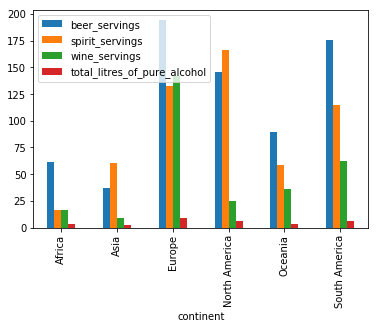

In [62]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

### 13. How do I explore a pandas Series? ([video](https://www.youtube.com/watch?v=QTVTq8SPzxM&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=15))

In [63]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [64]:
# examine the data type of each Series
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

**Exploring a non-numeric Series:**

In [65]:
# count the non-null values, unique values, and frequency of the most common value
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html)

In [66]:
# count how many times each value in the Series occurs
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [67]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [68]:
# display the unique values in the Series
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [69]:
# count the number of unique values in the Series
movies.genre.nunique()

16

Documentation for [**`unique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) and [**`nunique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html)

In [70]:
# compute a cross-tabulation of two Series
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


Documentation for [**`crosstab`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

**Exploring a numeric Series:**

In [71]:
# calculate various summary statistics
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [72]:
# many statistics are implemented as Series methods
movies.duration.mean()

120.97957099080695

Documentation for [**`mean`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)

In [73]:
# 'value_counts' is primarily useful for categorical data, not numerical data
movies.duration.value_counts().head()

112    23
113    22
102    20
101    20
129    19
Name: duration, dtype: int64

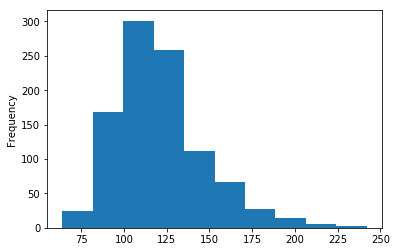

In [74]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

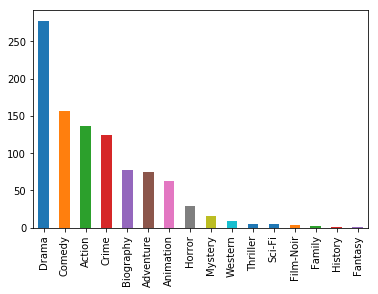

In [75]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)

## 14. How do I handle missing values in pandas? ([video](https://www.youtube.com/watch?v=fCMrO_VzeL8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=16))

In [76]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


**What does "NaN" mean?**

- "NaN" is not a string, rather it's a special value: **`numpy.nan`**.
- It stands for "Not a Number" and indicates a **missing value**.
- **`read_csv`** detects missing values (by default) when reading the file, and replaces them with this special value.

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [77]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [78]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [**`notnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

In [79]:
# count the number of missing values in each Series
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

This calculation works because:

1. The **`sum`** method for a DataFrame operates on **`axis=0`** by default (and thus produces column sums).
2. In order to add boolean values, pandas converts **`True`** to **1** and **`False`** to **0**.

In [80]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


**How to handle missing values** depends on the dataset as well as the nature of your analysis. Here are some options:

In [81]:
# examine the number of rows and columns
ufo.shape

(18241, 5)

In [82]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2486, 5)

Documentation for [**`dropna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [83]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

(18241, 5)

In [84]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [85]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [86]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [87]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [88]:
# explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [89]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

Documentation for [**`fillna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [90]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

[Working with missing data in pandas](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

## 15. How do I work with dates and times in pandas? ([video](https://www.youtube.com/watch?v=yCgJGsg0Xa4&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=25))

In [92]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [93]:
# 'Time' is currently stored as a string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [94]:
# hour could be accessed using string slicing, but this approach breaks too easily
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [95]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [96]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

Documentation for [**`to_datetime`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [97]:
# convenient Series attributes are now available
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [98]:
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [99]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

API reference for [datetime properties and methods](http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [100]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

In [102]:
# compare a datetime Series with a timestamp
ufo[ufo.Time >= ts].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,VARIOUS,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [103]:
# perform mathematical operations with timestamps (outputs a timedelta object)
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [104]:
# timedelta objects also have attributes you can access
(ufo.Time.max() - ufo.Time.min()).days

25781

In [105]:
# allow plots to appear in the notebook
%matplotlib inline

In [106]:
# count the number of UFO reports per year
ufo['Year'] = ufo.Time.dt.year
ufo.Year.value_counts().sort_index().head()

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

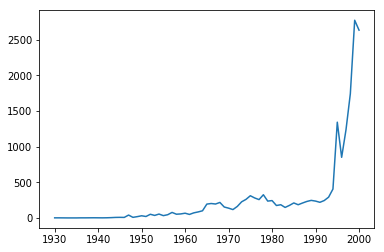

In [107]:
# plot the number of UFO reports per year (line plot is the default)
ufo.Year.value_counts().sort_index().plot()

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 26. How do I find and remove duplicate rows in pandas? ([video](https://www.youtube.com/watch?v=ht5buXUMqkQ&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=26))

In [108]:
# read a dataset of movie reviewers into a DataFrame
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [109]:
users.shape

(943, 4)

In [110]:
# detect duplicate zip codes: True if an item is identical to a previous item
users.zip_code.duplicated().tail()

user_id
939    False
940     True
941    False
942    False
943    False
Name: zip_code, dtype: bool

In [111]:
# count the duplicate items (True becomes 1, False becomes 0)
users.zip_code.duplicated().sum()

148

In [112]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
users.duplicated().tail()

user_id
939    False
940    False
941    False
942    False
943    False
dtype: bool

In [113]:
# count the duplicate rows
users.duplicated().sum()

7

Logic for [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):

- **`keep='first'`** (default): Mark duplicates as True except for the first occurrence.
- **`keep='last'`**: Mark duplicates as True except for the last occurrence.
- **`keep=False`**: Mark all duplicates as True.

In [115]:
# examine the duplicate rows (ignoring the first occurrence)
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [116]:
# examine the duplicate rows (ignoring the last occurrence)
users.loc[users.duplicated(keep='last'), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [117]:
# examine the duplicate rows (including all duplicates)
users.loc[users.duplicated(keep=False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [118]:
# drop the duplicate rows (inplace=False by default)
users.drop_duplicates(keep='first').shape

(936, 4)

In [119]:
users.drop_duplicates(keep='last').shape

(936, 4)

In [120]:
users.drop_duplicates(keep=False).shape

(929, 4)

Documentation for [**`drop_duplicates`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [121]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).sum()

16

In [122]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

(927, 4)